In [7]:
import pandas as pd
df= pd.read_csv('temp.csv', names=['Year', 'Avg_Temp', 'Avg_temp_uncertainty', 'Country'])

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:3326: DtypeWarning: Columns (1,2) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [8]:
df= df.iloc[1:]
df

,Year,Avg_Temp,Avg_temp_uncertainty,Country
1,1743-11-01,4.3839999999999995,2.294,Åland
2,1743-12-01,NaN,NaN,Åland
3,1744-01-01,NaN,NaN,Åland
4,1744-02-01,NaN,NaN,Åland
5,1744-03-01,NaN,NaN,Åland
...,...,...,...,...
577458,2013-05-01,19.059,1.022,Zimbabwe
577459,2013-06-01,17.613,0.473,Zimbabwe
577460,2013-07-01,17.0,0.453,Zimbabwe
577461,2013-08-01,19.759,0.717,Zimbabwe


In [5]:
df['Date']= pd.to_datetime(df.Year)
df['Year']= pd.to_datetime(df.Year)

In [6]:
df= df[df['Year'].dt.year >=2003]
df['Year']= df.Date.dt.year
df['Month']= df.Date.dt.month
df['Day']= df.Date.dt.day
df.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

,Year,Avg_Temp,Avg_temp_uncertainty,Country,Date,Month,Day
3111,2003,-3.975,0.583,Åland,2003-01-01,1,1
3112,2003,-3.673,0.34700000000000003,Åland,2003-02-01,2,1
3113,2003,1.0389999999999997,0.34,Åland,2003-03-01,3,1
3114,2003,1.99,0.338,Åland,2003-04-01,4,1
3115,2003,7.992000000000001,0.398,Åland,2003-05-01,5,1


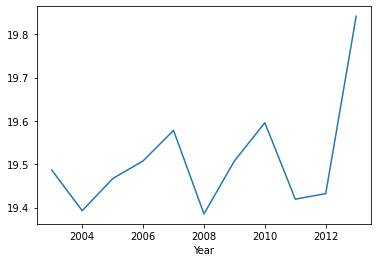

In [48]:
df.groupby(['Year'])['Avg_Temp'].mean().plot()

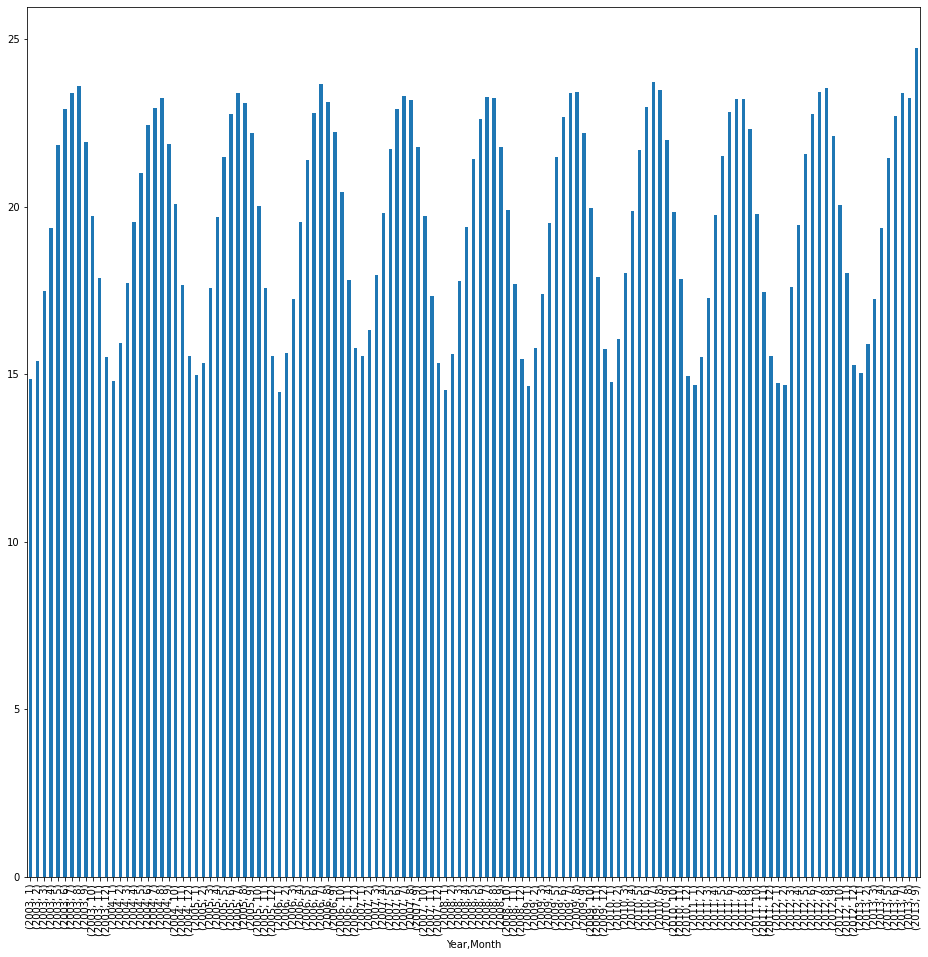

In [62]:
plt.figure(figsize=(16,16))
fig= df.groupby(['Year', 'Month'])['Avg_Temp'].mean().plot(kind='bar')

In [71]:
UBS= df[(df.Country == 'United States') | (df.Country=='United Kingdom') | (df.Country == 'Brazil') | (df.Country=='Poland') | (df.Country == 'China') | (df.Country=='Switzerland') | (df.Country == 'Singapore')]
UBS.Country.value_counts()

China             129
Poland            129
Singapore         129
Switzerland       129
United Kingdom    129
United States     129
Name: Country, dtype: int64

Text(0, 0.5, 'Temp in Celsius')

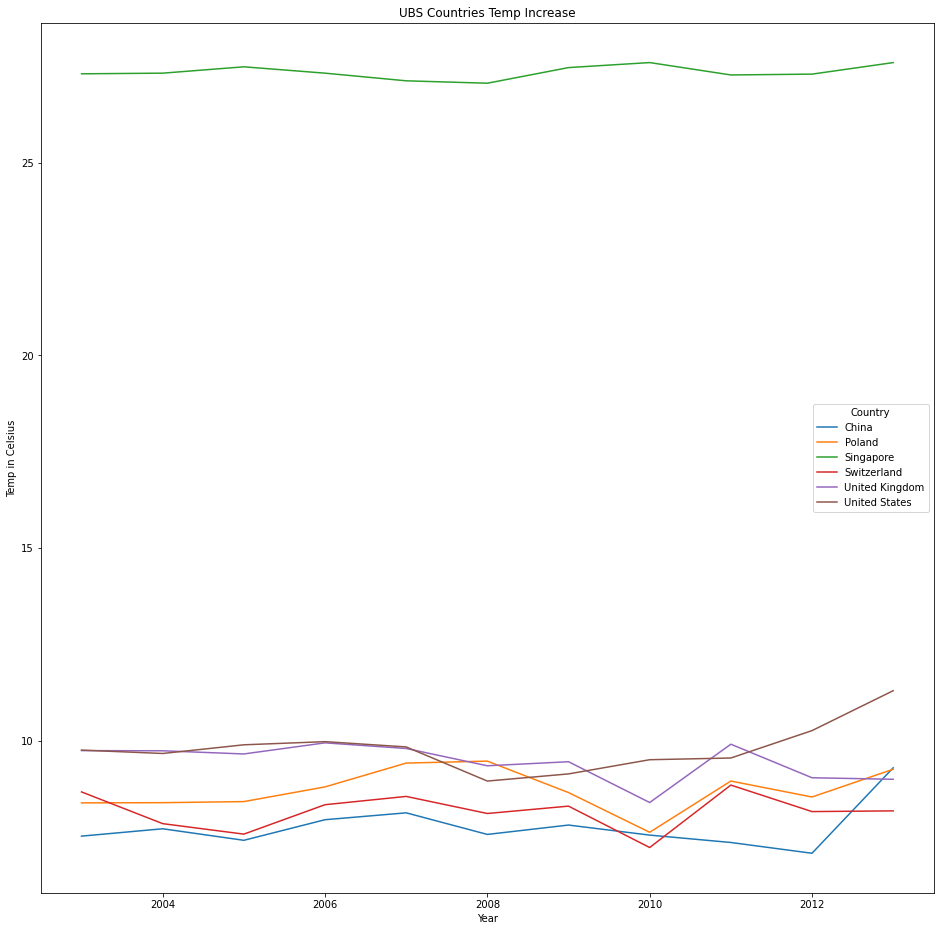

In [104]:
import seaborn as sns
plt.figure(figsize=(16,16))
graph= sns.lineplot(data=UBS, x='Year', y='Avg_Temp', hue='Country', ci=None)
graph.set_title('UBS Countries Temp Increase')
graph.set_xlabel('Year')
graph.set_ylabel('Temp in Celsius')

Text(0.5, 1.0, 'UBS Countries mismanged plastic waste in Ocean')

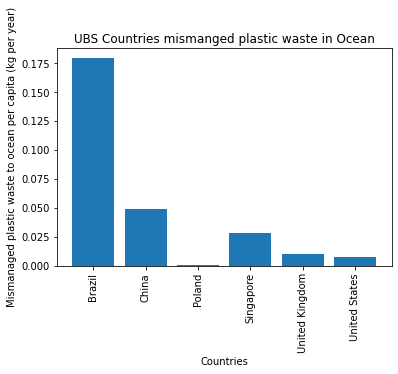

In [10]:
import matplotlib.pyplot as plt
df1= pd.read_csv('plastic-pollution.csv')
options= ['China', 'Poland', 'Singapore', 'Switzerland', 'United Kingdom', 'United States', 'Brazil']
df2= df1[df1.Entity.isin(options)]
plt.bar(df2.Entity, df2['Mismanaged plastic waste to ocean per capita (kg per year)'])
plt.xticks(rotation=90)
plt.xlabel('Countries')
plt.ylabel('Mismanaged plastic waste to ocean per capita (kg per year)')
plt.title('UBS Countries mismanged plastic waste in Ocean')

In [25]:
mis= pd.read_csv('mismanaged_plasticwaste.csv')
mis_UBS= mis[mis.Country.isin(options)]
mis_UBS.head()

,Country,Total_MismanagedPlasticWaste_2010 (millionT),Total_MismanagedPlasticWaste_2019 (millionT),Mismanaged_PlasticWaste_PerCapita_2010 (kg per year),Mismanaged_PlasticWaste_PerCapita_2019 (kg per year)
17,Brazil,471404,3296700,0.017,15.620469
29,China,8819717,12272200,0.092,8.559308
138,Poland,15703,14124,0.013,0.372783
157,Singapore,6472,2468,0.004,0.425224
185,United Kingdom,67549,29914,0.004,0.442973


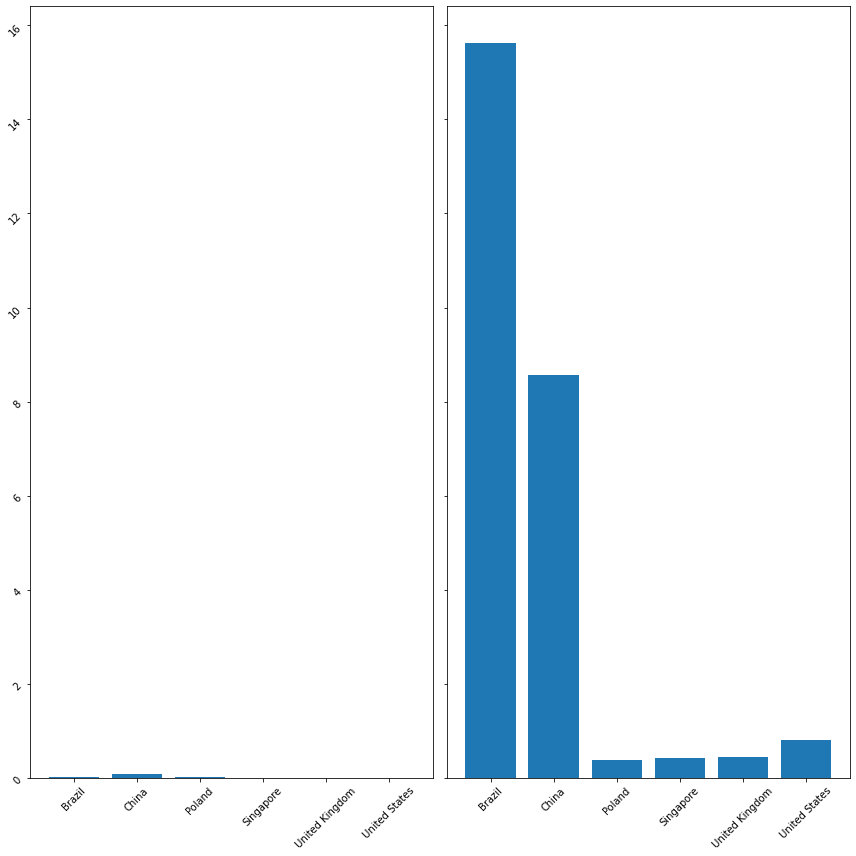

In [24]:
fig, axs = plt.subplots(1,2, sharey=True, figsize=(12,12))
axs[0].bar(mis_UBS.Country, mis_UBS['Mismanaged_PlasticWaste_PerCapita_2010 (kg per year) '])
axs[0].tick_params(labelrotation=45)
axs[1].bar(mis_UBS.Country, mis_UBS['Mismanaged_PlasticWaste_PerCapita_2019 (kg per year) '])
axs[1].tick_params(labelrotation=45)
plt.tight_layout()
# talk about increase between both year 
# talk bout average of these countires compared to the rest of the world 
# do the same for per captica

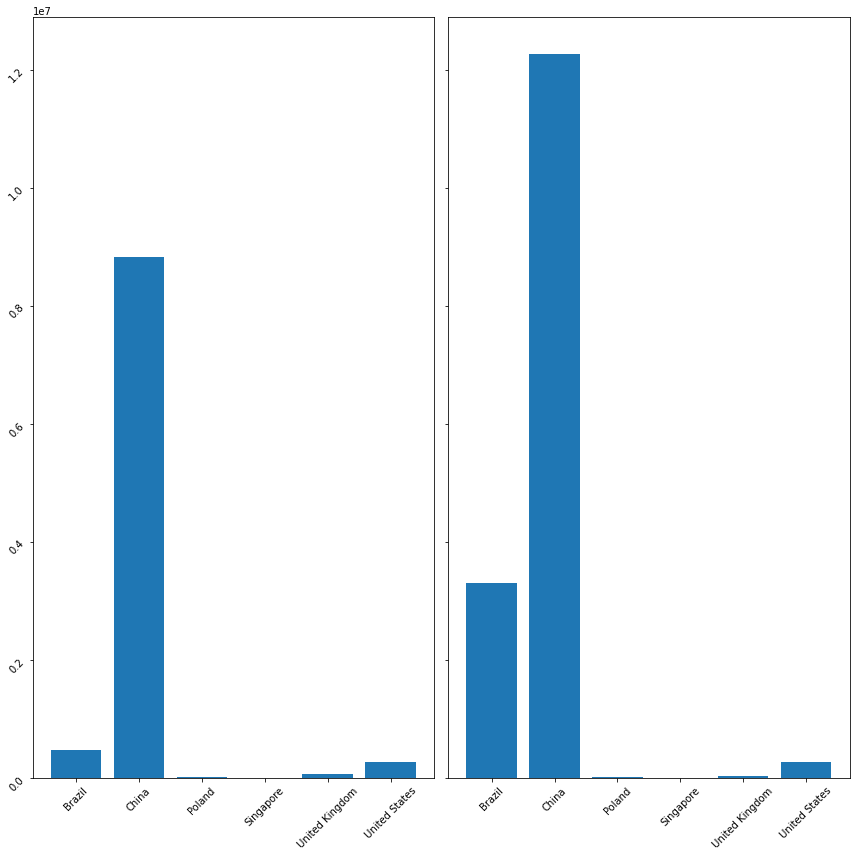

In [22]:
fig, axs = plt.subplots(1,2, sharey=True, figsize=(12,12))
axs[0].bar(mis_UBS.Country, mis_UBS['Total_MismanagedPlasticWaste_2010 (millionT)'])
axs[0].tick_params(labelrotation=45)
axs[1].bar(mis_UBS.Country, mis_UBS['Total_MismanagedPlasticWaste_2019 (millionT)'])
axs[1].tick_params(labelrotation=45)
plt.tight_layout()

In [60]:
mis_UBS['Mismanaged_PlasticWaset2010-2019']= mis_UBS['Mismanaged_PlasticWaste_PerCapita_2019 (kg per year) ']- mis_UBS['Mismanaged_PlasticWaste_PerCapita_2010 (kg per year) ']
mis_UBS['Total_mis']= mis_UBS['Total_MismanagedPlasticWaste_2019 (millionT)']- mis_UBS['Total_MismanagedPlasticWaste_2010 (millionT)']
mis_non['Mismanaged_PlasticWaset2010-2019']= mis_non['Mismanaged_PlasticWaste_PerCapita_2019 (kg per year) ']- mis_non['Mismanaged_PlasticWaste_PerCapita_2010 (kg per year) ']
mis_non['Total_mis']= mis_non['Total_MismanagedPlasticWaste_2019 (millionT)']- mis_non['Total_MismanagedPlasticWaste_2010 (millionT)']

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [34]:
mis_UBS

,Country,Total_MismanagedPlasticWaste_2010 (millionT),Total_MismanagedPlasticWaste_2019 (millionT),Mismanaged_PlasticWaste_PerCapita_2010 (kg per year),Mismanaged_PlasticWaste_PerCapita_2019 (kg per year),Mismanaged_PlasticWaset2010-2019,Total_mis
17,Brazil,471404,3296700,0.017,15.620469,-15.603469,-2825296
29,China,8819717,12272200,0.092,8.559308,-8.467308,-3452483
138,Poland,15703,14124,0.013,0.372783,-0.359783,1579
157,Singapore,6472,2468,0.004,0.425224,-0.421224,4004
185,United Kingdom,67549,29914,0.004,0.442973,-0.438973,37635
186,United States,275424,267469,0.007,0.812815,-0.805815,7955


In [62]:
print('Average UBS Total Mismanged 2010:', mis_UBS['Total_MismanagedPlasticWaste_2010 (millionT)'].mean())
print('Average UBS Total Mismanged 2019:', mis_UBS['Total_MismanagedPlasticWaste_2019 (millionT)'].mean())
print('Average UBS Mismanged Plastic Waste per Capita 2010:', mis_UBS['Mismanaged_PlasticWaste_PerCapita_2010 (kg per year) '].mean())
print('Average UBS Mismanged Plastic Waste per Capita 2019:', mis_UBS['Mismanaged_PlasticWaste_PerCapita_2019 (kg per year) '].mean())
print('Average UBS difference in Total Mismanged:', mis_UBS['Mismanaged_PlasticWaset2010-2019'].mean())
print('Average UBS difference in Mismanged Plastic Waste per Capita:', mis_UBS['Total_mis'].mean())

Average UBS Total Mismanged 2010: 1609378.1666666667
Average UBS Total Mismanged 2019: 2647145.8333333335
Average UBS Mismanged Plastic Waste per Capita 2010: 0.022833333333333334
Average UBS Mismanged Plastic Waste per Capita 2019: 4.372262170666667
Average UBS difference in Total Mismanged: 4.349428837333333
Average UBS difference in Mismanged Plastic Waste per Capita: 1037767.6666666666


In [42]:
import numpy as np
mis_non=mis[~mis.Country.isin(options)]
mis_non= mis_non.replace(0, np.NaN)

In [61]:
print('Average non-UBS Total Mismanged 2010:', mis_non['Total_MismanagedPlasticWaste_2010 (millionT)'].mean())
print('Average non-UBS Total Mismanged 2019:', mis_non['Total_MismanagedPlasticWaste_2019 (millionT)'].mean())
print('Average non-UBS Mismanged Plastic Waste per Capita 2010:', mis_non['Mismanaged_PlasticWaste_PerCapita_2010 (kg per year) '].mean())
print('Average non-UBS Mismanged Plastic Waste per Capita 2019:', mis_non['Mismanaged_PlasticWaste_PerCapita_2019 (kg per year) '].mean())
print('Average non-UBS difference in Total Mismanged:', mis_non['Mismanaged_PlasticWaset2010-2019'].mean())
print('Average non-UBS difference in Mismanged Plastic Waste per Capita:', mis_non['Total_mis'].mean())

Average non-UBS Total Mismanged 2010: 123265.12222222223
Average non-UBS Total Mismanged 2019: 292298.2484076433
Average non-UBS Mismanged Plastic Waste per Capita 2010: 0.04597222222222221
Average non-UBS Mismanged Plastic Waste per Capita 2019: 8.821134537045753
Average non-UBS difference in Total Mismanged: 8.581810610410958
Average non-UBS difference in Mismanged Plastic Waste per Capita: 153614.21476510068


In [47]:
df1.head()
Non_ubs= df1[~df1.Entity.isin(options)]

In [50]:
Non_ubs.dropna(inplace=True)
non_ubs= Non_ubs[Non_ubs.Entity != 'World']

/usr/local/lib/python3.7/dist-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


In [59]:
print('UBS mismanaged plastic waste:', df2['Mismanaged plastic waste to ocean per capita (kg per year)'].mean())
print('Non-UBS mismanaged plastic waste:', non_ubs['Mismanaged plastic waste to ocean per capita (kg per year)'].mean())

UBS mismanaged plastic waste: 0.0458723785
Non-UBS mismanaged plastic waste: 0.21798477394117646
